# Importing Required Modules

In [39]:
import numpy as np
import pandas as pd
import os
import keras
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import gc
import cv2
from models import *
from utils import *


### classID:
#### A numeric identifier of the sound class:
* 0 = air_conditioner
* 1 = car_horn
* 2 = children_playing
* 3 = dog_bark
* 4 = drilling
* 5 = engine_idling
* 6 = gun_shot
* 7 = jackhammer
* 8 = siren
* 9 = street_music


In [2]:
class_ord={0:'air_conditioner', 
           1:'car_horn',
           2:'children_playing',
           3:'dog_bark',
           4:'drilling',
           5:'engine_idling', 
           6:'gun_shot', 
           7:'jackhammer', 
           8:'siren',
           9:'street_music'}

In [3]:
meta_data=pd.read_csv(os.getcwd()+'\\metadata\\UrbanSound8K.csv')


* **fsID:**
The Freesound ID of the recording from which this excerpt (slice) is taken

* **start**
The start time of the slice in the original Freesound recording

* **end:**
The end time of slice in the original Freesound recording

* **salience:**
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

* **fold:**
The fold number (1-10) to which this file has been allocated.


In [4]:
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


 ### Total count of different sound files from which excerpts are taken

In [5]:
meta_data['fsID'].unique().shape

(1297,)

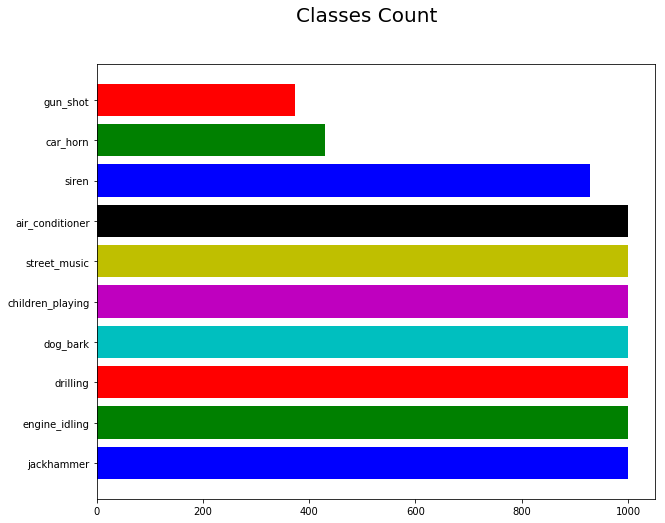

In [6]:
plt.figure(figsize=(10, 8)).suptitle('Classes Count', fontsize=20)
plt.barh(np.arange(len(class_ord)), width=meta_data.classID.value_counts(), color='bgrcmyk')
plt.yticks(np.arange(len(class_ord)), [class_ord[c] for c in meta_data.classID.value_counts().index])
plt.show()

In [7]:
''' CONTROLLERS '''

RAW_DATA_LOAD_ENABLED=False

RAW_DATA_VISUALIZATION_ENABLED=True

In [8]:
if RAW_DATA_LOAD_ENABLED:
    root_dir=os.path.join(os.getcwd(), 'audio')
    data, sample_rates, labels = load_data(root_dir=root_dir,
                                           folders=meta_data.fold,
                                       file_names=meta_data.slice_file_name,
                                       class_id=meta_data.classID,
                                       err_enabled=True)  
else:
    print('CONTROL DISABLED: please set "True" "RAW_DATA_LOAD_ENABLED" or check required globals')

Progress: |░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░| 100.00% | ETA: 0.00s | Elapsed Time: ~721.41s

Total Files: 8732
Successful: 8732
Unsuccessful: 0 



### Visualising  Sound Plots

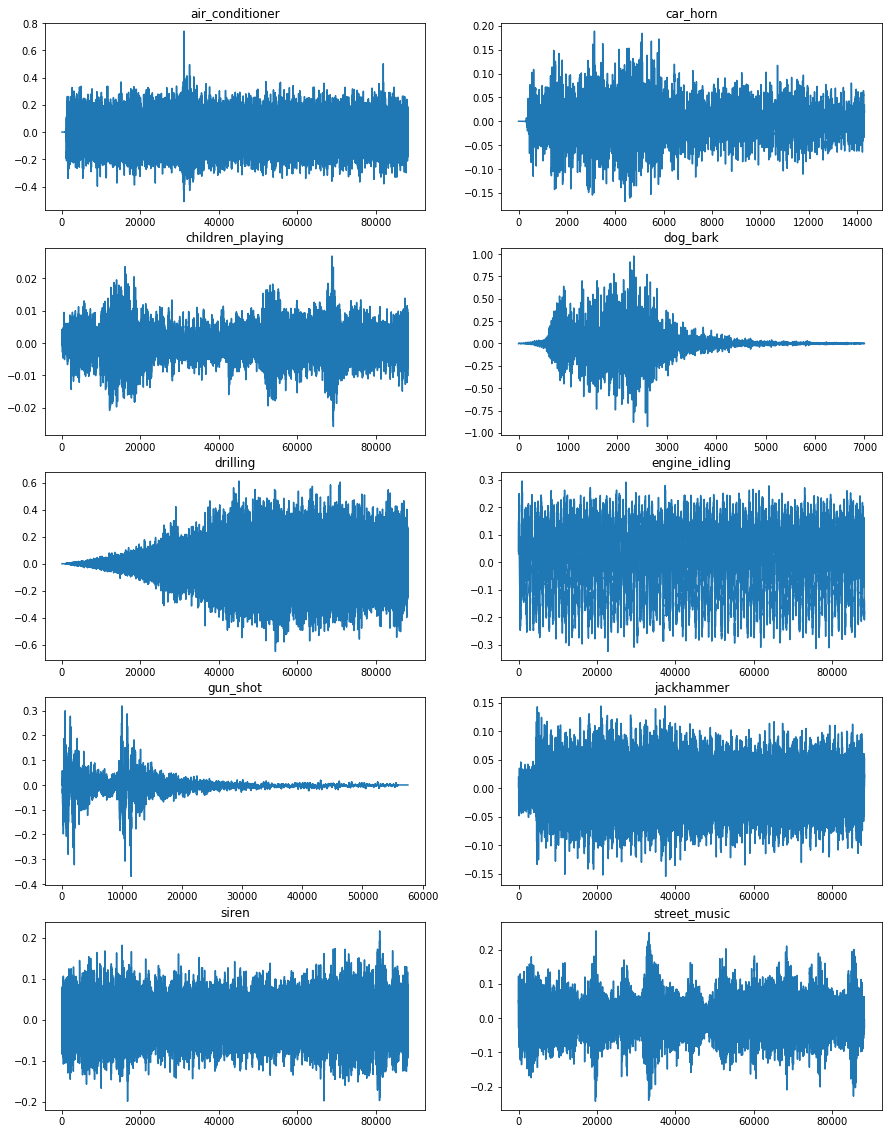

In [9]:
if RAW_DATA_VISUALIZATION_ENABLED and 'data' in globals():
    f, ax=plt.subplots(nrows=5, ncols=2, figsize=(15,20))
    ind=0
    for row in ax:
        for col in row:
            col.title.set_text(class_ord[ind])
            col.plot(data[labels.index(ind)])        
            ind+=1
else:
    print('CONTROL DISABLED: please set "True" "RAW_DATA_VISUALIZATION_ENABLED" or check required globals')   

# Training & Testing Phase


In [10]:
''' CONTROLERS '''

DATA_COOKING_ENABLED=False # required only once for generating images from sound data

TRAINING_ENABLED=False

LOAD_DATA_ENABLED = True

VISUALIZATION_ENABLED=True

ACCURACY_GRAPH_ENABLED=True #required TRAINING_ENABLED set to True.

### Generating Spectrogram Images From audio time series

In [11]:
if DATA_COOKING_ENABLED  and 'data' in globals() and 'class_ord' in globals():
    create_spectrogram_batch(data, sample_rates, labels, class_ord, parent_dir='image_data')
else:
    print('CONTROL DISABLED: please set "True" "DATA_COOKING_ENABLED" or check required globals')

CONTROL DISABLED: please set "True" "DATA_COOKING_ENABLED" or check required globals


### Visualising Spectrogram

In [12]:
if LOAD_DATA_ENABLED:
    x_im, y_im = load_spectrogram_images(parent_dir='image_data', size=(60, 60))
else:
    print('CONTROL DISABLED: please set "True" "LOAD_DATA_ENABLED" or check required globals')

Progress: |░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░| 100.00% | ETA: 0.00s | Elapsed Time: ~81.20s

In [13]:
x_im.shape, y_im.shape

((8732, 60, 60, 3), (8732,))

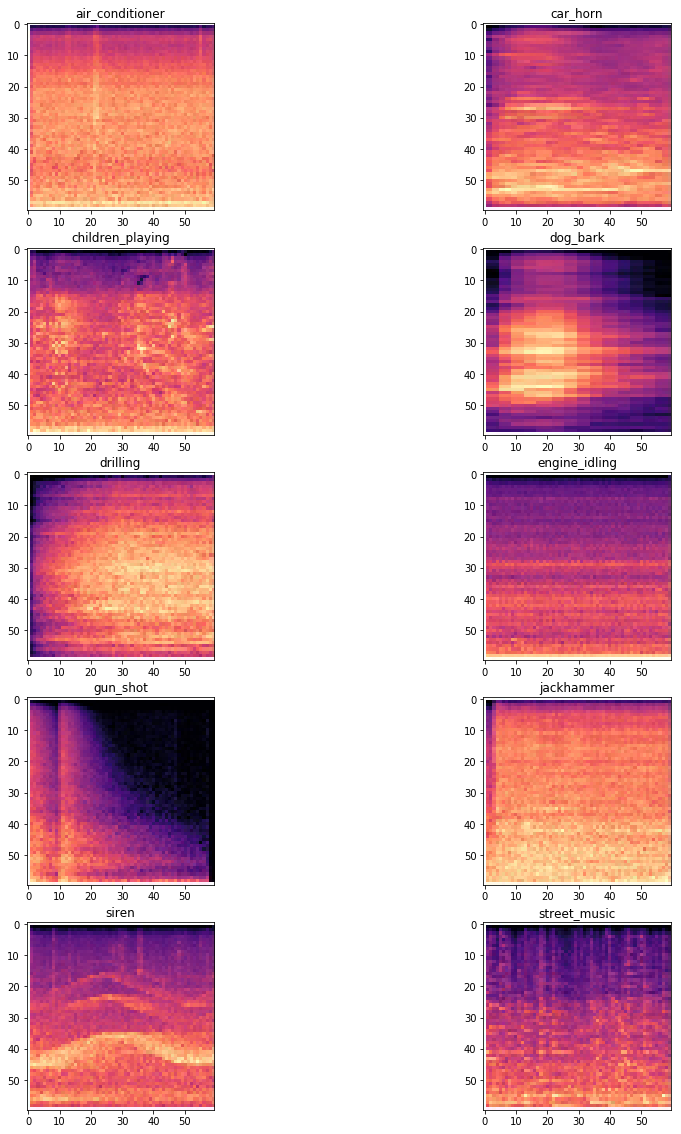

In [14]:
if VISUALIZATION_ENABLED and 'x_im' in globals() and 'y_im' in globals():
    f, ax=plt.subplots(nrows=5, ncols=2, figsize=(15,20))
    ind=0
    for row in ax:
        for col in row:
            col.title.set_text(class_ord[ind])
            col.imshow(x_im[np.where(y_im==ind)[0][0]])
            ind+=1
else:
    print('CONTROL DISABLED: please set "True" "VISUALIZATION_ENABLED" or check required globals')   

In [15]:
x_im_flatten=x_im.reshape((-1, 60*60*3))
x_im_flatten.shape

(8732, 10800)

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x_im_flatten, y_im, test_size=0.3, shuffle=True, random_state=0)
x_train.shape, x_test.shape

((6112, 10800), (2620, 10800))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [18]:
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Logistic Regression

In [19]:
clf=LogisticRegression(random_state=0, solver='saga', max_iter=20,)

In [20]:
clf.fit(x_train, y_train, )

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20, multi_class='warn', n_jobs=4,
          penalty='l2', random_state=0, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
x_test=scaler.transform(x_test)

In [22]:
y_test_pred=clf.predict(x_test)

In [23]:
print('Logistic Test data accuracy: {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))

Logistic Test data accuracy: 68.78%


# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree_clf=DecisionTreeClassifier(random_state=0, )

In [26]:
tree_clf.fit(x_train, y_train, )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
print('DecisionTreeClassifier Test data accuracy: {:.2f}%'.format(accuracy_score(y_test, tree_clf.predict(x_test))*100))

DecisionTreeClassifier Test data accuracy: 45.65%


# CNN

In [28]:
np.random.seed(0)
df = pd.read_csv('image_data//meta_data//spectrogram_images.csv', dtype=str)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,file_id,class
0,engine_idling691.jpg,5
1,car_horn82.jpg,1
2,drilling161.jpg,4
3,street_music456.jpg,9
4,street_music915.jpg,9


In [29]:
np.random.seed(0)
traindf, validdf, testdf = np.split(df.sample(frac=1), [int(.65*len(df)), int(.8*len(df))])

In [30]:
traindf.shape, testdf.shape, validdf.shape

((5675, 2), (1747, 2), (1310, 2))

In [31]:
input_shape=(128, 128, 3)


train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2
                                )

train_generator=train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="image_data",
    x_col="file_id",
    y_col="class",
    batch_size=32,
    seed=0,
    shuffle=True,
    class_mode="categorical",
    target_size=input_shape[:-1])


valid_datagen=ImageDataGenerator(rescale=1./255)

valid_generator=valid_datagen.flow_from_dataframe(
    dataframe=validdf,
    directory="image_data",
    x_col="file_id",
    y_col="class",
    batch_size=32,
    seed=0,
    shuffle=True,
    class_mode="categorical",
    target_size=input_shape[:-1])


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

Found 5675 validated image filenames belonging to 10 classes.
Found 1310 validated image filenames belonging to 10 classes.


In [32]:
IM_MODEL_NAME='CNN_MODEL_5_input_shape_128_128_epoch_40_v1'
im_model = load_or_create_model(parent_dir='spectrogram_models', old_model=IM_MODEL_NAME, args={'input_shape':input_shape})

In [33]:
im_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 24)      1824      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 62, 24)        0         
_________________________________________________________________
activation_6 (Activation)    (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_7 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 25, 48)         57648     
__________

In [34]:
if TRAINING_ENABLED:
    im_history = im_model.fit_generator(generator=train_generator,
                           steps_per_epoch=STEP_SIZE_TRAIN,
                           validation_data=valid_generator,
                           validation_steps=STEP_SIZE_VALID,
                           epochs=40)
    save_model(im_model, 'spectrogram_models', IM_MODEL_NAME)
else:
    print('CONTROL DISABLED: please set "True" "TRAINING_ENABLED" or check required globals')   

CONTROL DISABLED: please set "True" "TRAINING_ENABLED" or check required globals


### Accuracy

In [35]:
im_score_valid=im_model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)
im_score_train=im_model.evaluate_generator(generator=train_generator, steps=STEP_SIZE_TRAIN)
print('Train Data accuracy:', '{:.2f}%'.format(im_score_train[1]*100))
print('Validation Data accuracy:', '{:.2f}%'.format(im_score_valid[1]*100))

Train Data accuracy: 84.96%
Validation Data accuracy: 80.70%


In [36]:
if ACCURACY_GRAPH_ENABLED  and 'im_history' in  globals():
    im_train_acc=im_history.history['acc']
    im_val_acc=im_history.history['val_acc']
        
    plt.figure(figsize=(10,5)).suptitle('Accuracy v/s Epochs', fontsize=20)
    plt.plot(im_val_acc)
    plt.plot(im_train_acc)
    plt.legend(['validation accuracy', 'train accuracy'])
    plt.show()
else:
    print('CONTROL DISABLED: please set "True" "ACCURACY_GRAPH_ENABLED" or check required globals')

CONTROL DISABLED: please set "True" "ACCURACY_GRAPH_ENABLED" or check required globals


# Testing Phase

In [37]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory="image_data",
    x_col="file_id",
    y_col='class',
    batch_size=32,
    class_mode='categorical',
    target_size=input_shape[:-1])

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1747 validated image filenames belonging to 10 classes.


In [38]:
test_score = im_model.evaluate_generator(generator=test_generator, steps=STEP_SIZE_TEST)
print('Test Data accuracy: {:.2f}%'.format(test_score[1]*100))

Test Data accuracy: 80.84%
